## **Predicting the Quarterly Gross Profit for Amazon**


In [10]:
# Importing Packages
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib
import sklearn.preprocessing
from sklearn.metrics import r2_score
import keras

from keras.layers import Dense,Dropout,SimpleRNN,GRU, Bidirectional,LSTM
from tensorflow.keras.optimizers import SGD
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [11]:
# Reading the Data
df=pd.read_excel('Amazon Quarterly Gross Profit.xlsx')
df.head()

,Date,Quarterly Profit
0,2009-03-31,1148
1,2009-06-30,1133
2,2009-09-30,1273
3,2009-12-31,1977
4,2010-03-31,1630


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              55 non-null     datetime64[ns]
 1   Quarterly Profit  55 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1008.0 bytes


In [13]:
# Setting Date as Index
df = df.set_index('Date')
df.head()

,Quarterly Profit
Date,
2009-03-31,1148
2009-06-30,1133
2009-09-30,1273
2009-12-31,1977
2010-03-31,1630


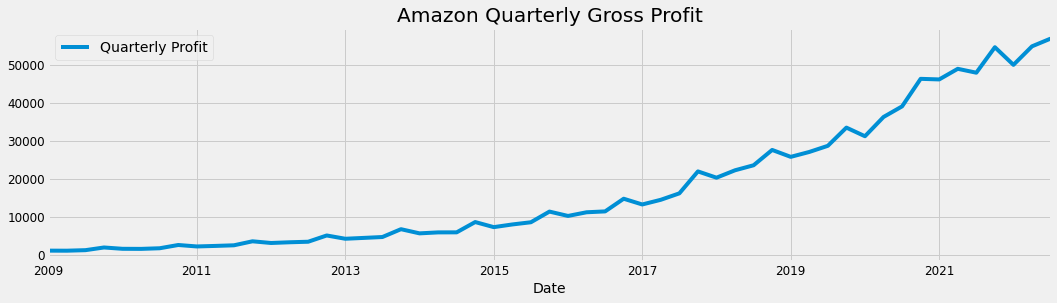

In [14]:
# Plotting the data
df.plot(figsize=(16,4),legend=True)
plt.title('Amazon Quarterly Gross Profit')
plt.show()

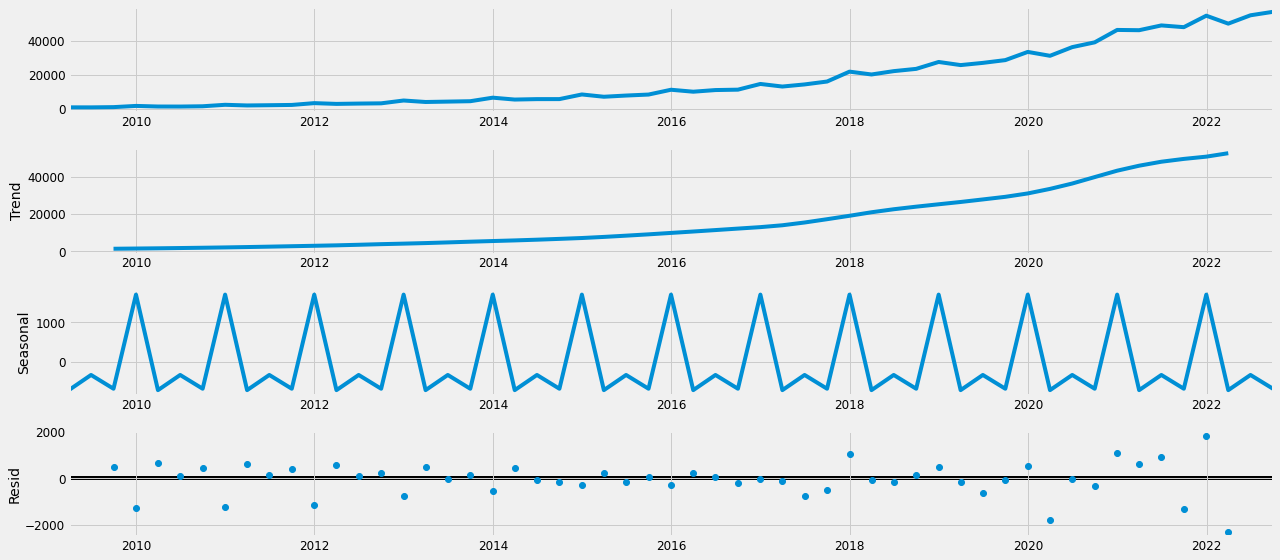

In [15]:
# Decomposition the data 
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(df, model = 'additive')
fig = decomposition.plot()
plt.show()

## SARIMA Model

In [17]:
df=pd.read_excel('Amazon Quarterly Gross Profit.xlsx')
df = df.set_index('Date')

In [18]:
# set the typical ranges for p, d, q
p = d = q = range(0, 2)

#take all possible combination for p, d and q
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [19]:
# Using Grid Search find the optimal set of parameters that yields the best performance
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df, order = param, seasonal_order = param_seasonal, enforce_stationary = False,enforce_invertibility=False) 
            result = mod.fit()   
            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, result.aic))
        except:
            continue

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC w

SARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1268.8717399515308
SARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1287.6421032855326
SARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:950.6029788642089


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1597.1159718650797


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency informat

SARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1668.8977214522577
SARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1225.192864786644


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:932.5987482314252


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:6.0
SARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1211.5701774997483


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1237.1205520499734
SARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:926.1252624640111


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2199.9241106375935
SARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1236.3669030890908
SARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1238.3650649522858


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided

SARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:919.9707323137444
SARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:921.7221641962884
SARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:999.2850859297615
SARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:973.0200776298158


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC w

SARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:732.2339969715446


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:1838.3751004217506
SARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:956.4363573526717
SARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:981.4428822172547
SARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:718.2568348166834


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:1870.961605984764
SARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1000.7064283731654
SARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:973.7079480410958
SARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:733.6532403483642


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2104.8968277960407
SARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:957.6297260048419


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:951.5357202233246


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:717.6748060688224


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2226.397663993158
SARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1025.2300888259622
SARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:999.5839923369697
SARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:751.554142939034


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information w

SARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:1843.2284208421545
SARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:985.2990339956339


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:980.5831679825568


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:739.051372296371


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:741.5366750519154


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


SARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:1026.5251459466497


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

SARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1000.2921447153628
SARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:752.7604254871341


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequen

SARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2246.969984656547
SARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:986.5730355895394


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarnin

SARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:980.5953410601666
SARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:738.3468965726983


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:740.3935258355958
SARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:999.8941956575547


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:972.4324283421506
SARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:733.0022212663935


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals


SARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:1899.6798697219833
SARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:956.8833070959581


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:949.4943624195294


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:716.6832903289461


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:1884.4451523455998


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:985.5497650199965


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:959.1284275066914
SARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:725.2034911760377


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:1893.1218477478465
SARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:960.6699698422341


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


SARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:958.5961855645832


R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred f

SARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:717.5895325205411
SARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:1698.042132894269


R:\Anaconda\envs\general\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [20]:
#Fitting the SARIMA model using above optimal combination of p, d, q (optimal means combination at which we got lowest AIC score)

model = sm.tsa.statespace.SARIMAX(df, order = (1, 1, 1),
                                  seasonal_order = (1, 1, 0, 12)
                                 )
result = model.fit()
print(result.summary().tables[1])

R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)
R:\Anaconda\envs\general\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency Q-DEC will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4749      0.492     -0.965      0.334      -1.439       0.489
ma.L1          0.1957      0.587      0.333      0.739      -0.955       1.346
ar.S.L12       0.8051      0.203      3.973      0.000       0.408       1.202
sigma2      1.255e+06   2.32e+05      5.421      0.000    8.02e+05    1.71e+06


In [21]:
prediction = result.get_prediction(start = pd.to_datetime('2021-03-31'), dynamic = False)
prediction_ci = prediction.conf_int()
prediction_ci

,lower Quarterly Profit,upper Quarterly Profit
2021-03-31,42398.000144,46790.208160
2021-06-30,46333.307402,50725.515418
2021-09-30,48772.541951,53164.749967
2021-12-31,51484.935925,55877.143941
2022-03-31,49395.266486,53787.474502
2022-06-30,50054.645715,54446.853731
2022-09-30,54264.242912,58656.450928


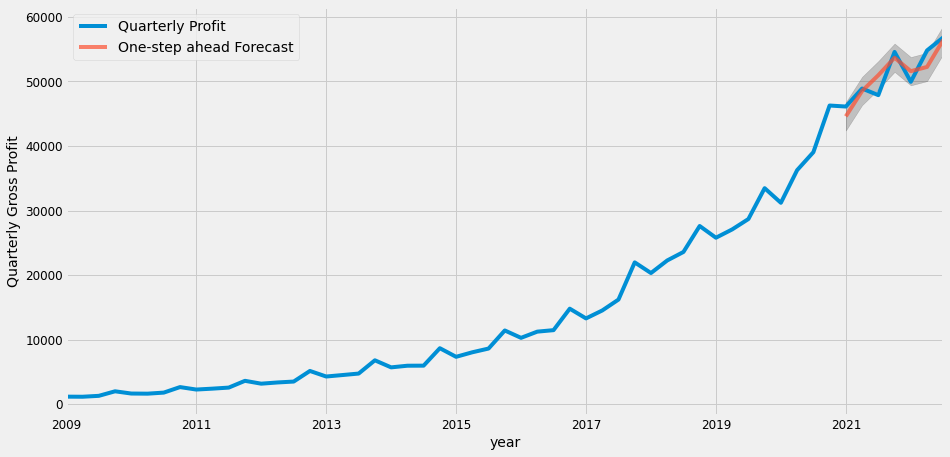

In [22]:
#Visualize the forecasting
ax = df['2009':].plot(label = 'observed')
prediction.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = 0.7, figsize = (14, 7))
ax.fill_between(prediction_ci.index, prediction_ci.iloc[:, 0], prediction_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax.set_xlabel("year")
ax.set_ylabel('Quarterly Gross Profit')
plt.legend()
plt.show()

In [23]:
# Evaluation metrics are Squared Mean Error(SME) and Root Mean Squared Error(RMSE)

from sklearn.metrics import mean_squared_error

y_hat = prediction.predicted_mean
y_truth = df['2021-03-31':]
mse = mean_squared_error(y_truth,y_hat)
rmse = np.sqrt(mse)

print('The Mean Squared Error of our forecasts is', mse)
print('The Root Mean Squared Error of our forecasts is', rmse)

The Mean Squared Error of our forecasts is 3168962.372852964
The Root Mean Squared Error of our forecasts is 1780.1579628934517


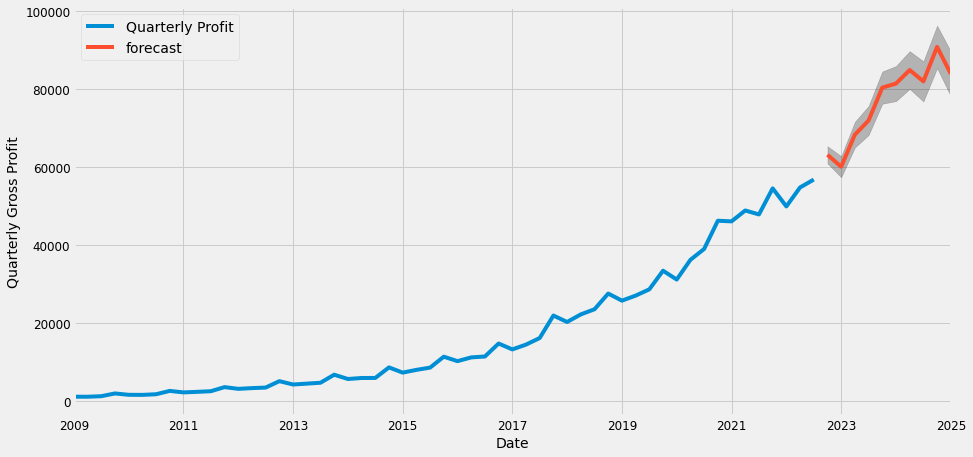

In [24]:
# forcasting for out of sample data
pred_uc = result.get_forecast(steps = 10)
pred_ci = pred_uc.conf_int()

ax = df.plot(label = 'observed', figsize = (14, 7))
pred_uc.predicted_mean.plot(ax = ax, label = 'forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quarterly Gross Profit')

plt.legend()
plt.show()


## **DNN MODEL**

In [25]:
def convert2matrix(data_arr, look_back):
    X, Y =[], []
    for i in range(len(data_arr)-look_back):
        d=i+look_back  
        X.append(data_arr[i:d,0])
        Y.append(data_arr[d,0])
    return np.array(X).astype('int'), np.array(Y).astype('int')

In [26]:
df=pd.read_excel('Amazon Quarterly Gross Profit.xlsx')

df = df.set_index('Date')


In [27]:
df1 = df
#Split data set into testing dataset and train dataset
train_size = 49
train, test =df1.values[0:train_size,:],df1.values[train_size:len(df1.values),:]
# setup look_back window 
look_back = 4
#convert dataset into right shape in order to input into the DNN
trainX, trainY = convert2matrix(train, look_back)
testX, testY = convert2matrix(test, look_back)

In [28]:
from keras.models import Sequential
from keras.layers import Dense
def model_dnn(look_back):
    model=Sequential()
    model.add(Dense(units=32, input_dim=look_back, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error',  optimizer='adam',metrics = ['mse', 'mae'])
    return model

In [29]:
model=model_dnn(look_back)
history=model.fit(trainX,trainY, epochs=500, batch_size=4, verbose=1, validation_data=(testX,testY),shuffle=False)

Epoch 1/500
12/12 [==============================] - 1s 16ms/step - loss: 2350840.2500 - mse: 2350840.2500 - mae: 1033.5248 - val_loss: 54679544.0000 - val_mse: 54679544.0000 - val_mae: 7304.3223
Epoch 2/500
12/12 [==============================] - 0s 4ms/step - loss: 2116283.5000 - mse: 2116283.5000 - mae: 986.0873 - val_loss: 52920608.0000 - val_mse: 52920608.0000 - val_mae: 7196.0234
Epoch 3/500
12/12 [==============================] - 0s 4ms/step - loss: 1979505.3750 - mse: 1979505.3750 - mae: 952.7255 - val_loss: 49294968.0000 - val_mse: 49294968.0000 - val_mae: 6949.4453
Epoch 4/500
12/12 [==============================] - 0s 4ms/step - loss: 2070286.6250 - mse: 2070286.6250 - mae: 966.9977 - val_loss: 51020464.0000 - val_mse: 51020464.0000 - val_mae: 7077.1367
Epoch 5/500
12/12 [==============================] - 0s 3ms/step - loss: 1921211.3750 - mse: 1921211.3750 - mae: 931.6425 - val_loss: 45651016.0000 - val_mse: 45651016.0000 - val_mae: 6691.1348
Epoch 6/500
12/12 [=========

12/12 [==============================] - 0s 4ms/step - loss: 1813773.1250 - mse: 1813773.1250 - mae: 858.9999 - val_loss: 39127224.0000 - val_mse: 39127224.0000 - val_mae: 6239.7754
Epoch 44/500
12/12 [==============================] - 0s 7ms/step - loss: 1685321.7500 - mse: 1685321.7500 - mae: 829.9462 - val_loss: 31843666.0000 - val_mse: 31843666.0000 - val_mae: 5628.0352
Epoch 45/500
12/12 [==============================] - 0s 7ms/step - loss: 2031258.8750 - mse: 2031258.8750 - mae: 900.5487 - val_loss: 41728408.0000 - val_mse: 41728408.0000 - val_mae: 6446.2578
Epoch 46/500
12/12 [==============================] - 0s 6ms/step - loss: 1889781.1250 - mse: 1889781.1250 - mae: 901.3545 - val_loss: 27558732.0000 - val_mse: 27558732.0000 - val_mae: 5236.0645
Epoch 47/500
12/12 [==============================] - 0s 5ms/step - loss: 2825526.7500 - mse: 2825526.7500 - mae: 1099.3041 - val_loss: 49002132.0000 - val_mse: 49002132.0000 - val_mae: 6988.4727
Epoch 48/500
12/12 [=================

12/12 [==============================] - 0s 4ms/step - loss: 1563444.1250 - mse: 1563444.1250 - mae: 781.5697 - val_loss: 32465204.0000 - val_mse: 32465204.0000 - val_mae: 5697.7715
Epoch 86/500
12/12 [==============================] - 0s 4ms/step - loss: 1578831.1250 - mse: 1578831.1250 - mae: 783.8268 - val_loss: 33381408.0000 - val_mse: 33381408.0000 - val_mae: 5777.6406
Epoch 87/500
12/12 [==============================] - 0s 4ms/step - loss: 1555133.8750 - mse: 1555133.8750 - mae: 779.9241 - val_loss: 32044972.0000 - val_mse: 32044972.0000 - val_mae: 5660.8262
Epoch 88/500
12/12 [==============================] - 0s 3ms/step - loss: 1582728.7500 - mse: 1582728.7500 - mae: 782.9868 - val_loss: 33623968.0000 - val_mse: 33623968.0000 - val_mae: 5798.6172
Epoch 89/500
12/12 [==============================] - 0s 3ms/step - loss: 1546925.0000 - mse: 1546925.0000 - mae: 781.1005 - val_loss: 31557820.0000 - val_mse: 31557820.0000 - val_mae: 5617.6113
Epoch 90/500
12/12 [==================

Epoch 127/500
12/12 [==============================] - 0s 3ms/step - loss: 1479616.7500 - mse: 1479616.7500 - mae: 785.7370 - val_loss: 27877766.0000 - val_mse: 27877766.0000 - val_mae: 5272.1660
Epoch 128/500
12/12 [==============================] - 0s 3ms/step - loss: 1624152.7500 - mse: 1624152.7500 - mae: 773.9398 - val_loss: 35857352.0000 - val_mse: 35857352.0000 - val_mae: 5981.6465
Epoch 129/500
12/12 [==============================] - 0s 3ms/step - loss: 1489361.7500 - mse: 1489361.7500 - mae: 792.3893 - val_loss: 26835990.0000 - val_mse: 26835990.0000 - val_mae: 5171.4512
Epoch 130/500
12/12 [==============================] - 0s 5ms/step - loss: 1687350.6250 - mse: 1687350.6250 - mae: 790.0201 - val_loss: 37130512.0000 - val_mse: 37130512.0000 - val_mae: 6086.5703
Epoch 131/500
12/12 [==============================] - 0s 4ms/step - loss: 1518930.0000 - mse: 1518930.0000 - mae: 809.8471 - val_loss: 25416320.0000 - val_mse: 25416320.0000 - val_mae: 5031.2363
Epoch 132/500
12/12 

Epoch 169/500
12/12 [==============================] - 0s 4ms/step - loss: 1533584.5000 - mse: 1533584.5000 - mae: 821.8983 - val_loss: 22694564.0000 - val_mse: 22694564.0000 - val_mae: 4737.3320
Epoch 170/500
12/12 [==============================] - 0s 4ms/step - loss: 1819533.8750 - mse: 1819533.8750 - mae: 831.1256 - val_loss: 41209248.0000 - val_mse: 41209248.0000 - val_mae: 6402.1836
Epoch 171/500
12/12 [==============================] - 0s 4ms/step - loss: 1529140.5000 - mse: 1529140.5000 - mae: 820.4999 - val_loss: 22717960.0000 - val_mse: 22717960.0000 - val_mae: 4738.7227
Epoch 172/500
12/12 [==============================] - 0s 3ms/step - loss: 1813343.5000 - mse: 1813343.5000 - mae: 828.0430 - val_loss: 41075336.0000 - val_mse: 41075336.0000 - val_mae: 6390.9570
Epoch 173/500
12/12 [==============================] - 0s 3ms/step - loss: 1525461.0000 - mse: 1525461.0000 - mae: 819.2305 - val_loss: 22600224.0000 - val_mse: 22600224.0000 - val_mae: 4725.2168
Epoch 174/500
12/12 

Epoch 211/500
12/12 [==============================] - 0s 4ms/step - loss: 1527468.7500 - mse: 1527468.7500 - mae: 821.7844 - val_loss: 21670938.0000 - val_mse: 21670938.0000 - val_mae: 4606.8027
Epoch 212/500
12/12 [==============================] - 0s 3ms/step - loss: 1840679.5000 - mse: 1840679.5000 - mae: 835.9934 - val_loss: 41678400.0000 - val_mse: 41678400.0000 - val_mae: 6424.8047
Epoch 213/500
12/12 [==============================] - 0s 4ms/step - loss: 1519518.2500 - mse: 1519518.2500 - mae: 819.5363 - val_loss: 21700344.0000 - val_mse: 21700344.0000 - val_mae: 4608.9766
Epoch 214/500
12/12 [==============================] - 0s 4ms/step - loss: 1801333.3750 - mse: 1801333.3750 - mae: 825.7284 - val_loss: 40774140.0000 - val_mse: 40774140.0000 - val_mae: 6353.2617
Epoch 215/500
12/12 [==============================] - 0s 4ms/step - loss: 1507701.5000 - mse: 1507701.5000 - mae: 816.5569 - val_loss: 22135392.0000 - val_mse: 22135392.0000 - val_mae: 4655.1719
Epoch 216/500
12/12 

Epoch 253/500
12/12 [==============================] - 0s 4ms/step - loss: 1481756.1250 - mse: 1481756.1250 - mae: 809.8022 - val_loss: 21849270.0000 - val_mse: 21849270.0000 - val_mae: 4607.4141
Epoch 254/500
12/12 [==============================] - 0s 4ms/step - loss: 1748709.0000 - mse: 1748709.0000 - mae: 810.6380 - val_loss: 39913608.0000 - val_mse: 39913608.0000 - val_mae: 6272.6992
Epoch 255/500
12/12 [==============================] - 0s 4ms/step - loss: 1469894.6250 - mse: 1469894.6250 - mae: 806.8843 - val_loss: 22186036.0000 - val_mse: 22186036.0000 - val_mae: 4643.1172
Epoch 256/500
12/12 [==============================] - 0s 4ms/step - loss: 1753485.8750 - mse: 1753485.8750 - mae: 813.0675 - val_loss: 39828112.0000 - val_mse: 39828112.0000 - val_mae: 6265.1992
Epoch 257/500
12/12 [==============================] - 0s 4ms/step - loss: 1477271.5000 - mse: 1477271.5000 - mae: 809.0211 - val_loss: 22031346.0000 - val_mse: 22031346.0000 - val_mae: 4625.3945
Epoch 258/500
12/12 

Epoch 295/500
12/12 [==============================] - 0s 4ms/step - loss: 1462113.1250 - mse: 1462113.1250 - mae: 805.6877 - val_loss: 21807964.0000 - val_mse: 21807964.0000 - val_mae: 4587.2715
Epoch 296/500
12/12 [==============================] - 0s 4ms/step - loss: 1751183.6250 - mse: 1751183.6250 - mae: 810.6156 - val_loss: 40180384.0000 - val_mse: 40180384.0000 - val_mae: 6283.1680
Epoch 297/500
12/12 [==============================] - 0s 4ms/step - loss: 1455026.8750 - mse: 1455026.8750 - mae: 803.5634 - val_loss: 21950422.0000 - val_mse: 21950422.0000 - val_mae: 4602.1660
Epoch 298/500
12/12 [==============================] - 0s 4ms/step - loss: 1713871.6250 - mse: 1713871.6250 - mae: 802.6756 - val_loss: 39360168.0000 - val_mse: 39360168.0000 - val_mae: 6216.9434
Epoch 299/500
12/12 [==============================] - 0s 4ms/step - loss: 1442702.3750 - mse: 1442702.3750 - mae: 800.3248 - val_loss: 22333312.0000 - val_mse: 22333312.0000 - val_mae: 4643.1250
Epoch 300/500
12/12 

Epoch 337/500
12/12 [==============================] - 0s 4ms/step - loss: 1430044.1250 - mse: 1430044.1250 - mae: 796.6869 - val_loss: 22390110.0000 - val_mse: 22390110.0000 - val_mae: 4639.0215
Epoch 338/500
12/12 [==============================] - 0s 4ms/step - loss: 1710738.5000 - mse: 1710738.5000 - mae: 803.8829 - val_loss: 39456128.0000 - val_mse: 39456128.0000 - val_mae: 6216.8809
Epoch 339/500
12/12 [==============================] - 0s 4ms/step - loss: 1434288.8750 - mse: 1434288.8750 - mae: 797.8236 - val_loss: 22162884.0000 - val_mse: 22162884.0000 - val_mae: 4613.7715
Epoch 340/500
12/12 [==============================] - 0s 4ms/step - loss: 1716770.8750 - mse: 1716770.8750 - mae: 804.9932 - val_loss: 39646876.0000 - val_mse: 39646876.0000 - val_mae: 6231.8945
Epoch 341/500
12/12 [==============================] - 0s 4ms/step - loss: 1434088.1250 - mse: 1434088.1250 - mae: 797.7130 - val_loss: 22072052.0000 - val_mse: 22072052.0000 - val_mae: 4603.3945
Epoch 342/500
12/12 

Epoch 379/500
12/12 [==============================] - 0s 3ms/step - loss: 1427111.1250 - mse: 1427111.1250 - mae: 796.0348 - val_loss: 22101422.0000 - val_mse: 22101422.0000 - val_mae: 4600.6875
Epoch 380/500
12/12 [==============================] - 0s 4ms/step - loss: 1717741.0000 - mse: 1717741.0000 - mae: 806.4846 - val_loss: 39902432.0000 - val_mse: 39902432.0000 - val_mae: 6248.0156
Epoch 381/500
12/12 [==============================] - 0s 4ms/step - loss: 1430840.5000 - mse: 1430840.5000 - mae: 796.9025 - val_loss: 21905796.0000 - val_mse: 21905796.0000 - val_mae: 4579.1816
Epoch 382/500
12/12 [==============================] - 0s 4ms/step - loss: 1692349.8750 - mse: 1692349.8750 - mae: 801.5405 - val_loss: 39342148.0000 - val_mse: 39342148.0000 - val_mae: 6202.8086
Epoch 383/500
12/12 [==============================] - 0s 4ms/step - loss: 1424837.5000 - mse: 1424837.5000 - mae: 795.5510 - val_loss: 22167640.0000 - val_mse: 22167640.0000 - val_mae: 4607.6934
Epoch 384/500
12/12 

Epoch 421/500
12/12 [==============================] - 0s 4ms/step - loss: 1394542.6250 - mse: 1394542.6250 - mae: 787.1207 - val_loss: 22840960.0000 - val_mse: 22840960.0000 - val_mae: 4675.1621
Epoch 422/500
12/12 [==============================] - 0s 4ms/step - loss: 1656703.6250 - mse: 1656703.6250 - mae: 793.0384 - val_loss: 38998392.0000 - val_mse: 38998392.0000 - val_mae: 6170.6133
Epoch 423/500
12/12 [==============================] - 0s 4ms/step - loss: 1404148.6250 - mse: 1404148.6250 - mae: 788.6937 - val_loss: 22609752.0000 - val_mse: 22609752.0000 - val_mae: 4649.9883
Epoch 424/500
12/12 [==============================] - 0s 4ms/step - loss: 1684919.6250 - mse: 1684919.6250 - mae: 799.3945 - val_loss: 39649300.0000 - val_mse: 39649300.0000 - val_mae: 6223.0703
Epoch 425/500
12/12 [==============================] - 0s 4ms/step - loss: 1411663.0000 - mse: 1411663.0000 - mae: 790.7885 - val_loss: 22307534.0000 - val_mse: 22307534.0000 - val_mae: 4616.6016
Epoch 426/500
12/12 

Epoch 463/500
12/12 [==============================] - 0s 4ms/step - loss: 1395601.6250 - mse: 1395601.6250 - mae: 787.8514 - val_loss: 22591812.0000 - val_mse: 22591812.0000 - val_mae: 4643.4785
Epoch 464/500
12/12 [==============================] - 0s 4ms/step - loss: 1647019.5000 - mse: 1647019.5000 - mae: 791.0351 - val_loss: 39371528.0000 - val_mse: 39371528.0000 - val_mae: 6197.2891
Epoch 465/500
12/12 [==============================] - 0s 4ms/step - loss: 1389114.8750 - mse: 1389114.8750 - mae: 786.6702 - val_loss: 22658124.0000 - val_mse: 22658124.0000 - val_mae: 4650.5703
Epoch 466/500
12/12 [==============================] - 0s 4ms/step - loss: 1614937.2500 - mse: 1614937.2500 - mae: 783.2628 - val_loss: 38721428.0000 - val_mse: 38721428.0000 - val_mae: 6144.4707
Epoch 467/500
12/12 [==============================] - 0s 3ms/step - loss: 1378574.2500 - mse: 1378574.2500 - mae: 784.9340 - val_loss: 23132694.0000 - val_mse: 23132694.0000 - val_mae: 4701.4902
Epoch 468/500
12/12 

In [30]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

In [31]:
train_score = model.evaluate(trainX, trainY, verbose=0)
print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(train_score[1]), train_score[2]))
test_score = model.evaluate(testX, testY, verbose=0)
print(train_score)
print(test_score)
print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
% (np.sqrt(test_score[1]), test_score[2]))

Train Root Mean Squared Error(RMSE): 1158.29; Train Mean Absolute Error(MAE) : 734.11 
[1341638.25, 1341638.25, 734.1107788085938]
[38831080.0, 38831080.0, 6151.0078125]
Test Root Mean Squared Error(RMSE): 6231.46; Test Mean Absolute Error(MAE) : 6151.01 


In [32]:
 def prediction_plot(testY, test_predict):
      len_prediction=[x for x in range(len(testY))]
      plt.figure(figsize=(8,4))
      plt.plot(len_prediction, testY[:8], marker='.', label="actual")
      plt.plot(len_prediction, test_predict[:8], 'r', label="prediction")
      plt.tight_layout()
      sns.despine(top=True)
      plt.subplots_adjust(left=0.07)
      plt.ylabel('Ads Daily Spend', size=15)
      plt.xlabel('Time step', size=15)
      plt.legend(fontsize=15)
      plt.show();

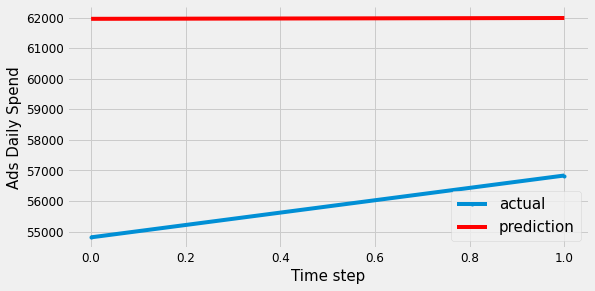

In [33]:
test_predict = model.predict(testX)
prediction_plot(testY, test_predict)

## **GRU and BiLSTM Models** 

In [34]:
df=pd.read_excel('Amazon Quarterly Gross Profit.xlsx')
df.head()

,Date,Quarterly Profit
0,2009-03-31,1148
1,2009-06-30,1133
2,2009-09-30,1273
3,2009-12-31,1977
4,2010-03-31,1630


In [35]:
df = df.set_index('Date')
df.head()

,Quarterly Profit
Date,
2009-03-31,1148
2009-06-30,1133
2009-09-30,1273
2009-12-31,1977
2010-03-31,1630


In [36]:
# Split train data and test data
train_size = int(len(df)*0.8)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [37]:
scaler = MinMaxScaler().fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [38]:
# Create input dataset
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
LOOK_BACK = 4
X_train, y_train = create_dataset(train_scaled,LOOK_BACK)
X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape) 
print('y_test.shape: ', y_test.shape)

X_train.shape:  (40, 4, 1)
y_train.shape:  (40, 1)
X_test.shape:  (7, 4, 1)
y_test.shape:  (7, 1)


In [39]:
# Create BiLSTM model
def create_bilstm(units):
    model = Sequential()
    # Input layer
    model.add(Bidirectional(
              LSTM(units = units, return_sequences=True), 
              input_shape=(X_train.shape[1], X_train.shape[2])))
    # Hidden layer
    model.add(Bidirectional(LSTM(units = units)))
    model.add(Dense(1))
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_bilstm = create_bilstm(64)
# Create GRU model
def create_gru(units):
    model = Sequential()
    # Input layer
    model.add(GRU (units = units, return_sequences = True, 
    input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.2)) 
    # Hidden layer
    model.add(GRU(units = units)) 
    model.add(Dropout(0.2))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(optimizer='adam',loss='mse')
    return model
model_gru = create_gru(64)

In [40]:
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                               patience = 10)
    history = model.fit(X_train, y_train, epochs = 100,  
                        validation_split = 0.2,
                        batch_size = 16, shuffle = False, 
                        callbacks = [early_stop])
    return history
history_gru = fit_model(model_gru)

Epoch 1/100
2/2 [==============================] - 3s 715ms/step - loss: 0.0467 - val_loss: 0.4321
Epoch 2/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0279 - val_loss: 0.3178
Epoch 3/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0155 - val_loss: 0.2220
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0117 - val_loss: 0.1464
Epoch 5/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0097 - val_loss: 0.0932
Epoch 6/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0103 - val_loss: 0.0614
Epoch 7/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0134 - val_loss: 0.0457
Epoch 8/100
2/2 [==============================] - 0s 37ms/step - loss: 0.0125 - val_loss: 0.0394
Epoch 9/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0114 - val_loss: 0.0380
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0089 - val_loss: 0.0386
Epoch 11/100
2/2 [

In [41]:
history_bilstm = fit_model(model_bilstm)

Epoch 1/100
2/2 [==============================] - 6s 1s/step - loss: 0.0481 - val_loss: 0.4576
Epoch 2/100
2/2 [==============================] - 0s 38ms/step - loss: 0.0347 - val_loss: 0.3571
Epoch 3/100
2/2 [==============================] - 0s 40ms/step - loss: 0.0238 - val_loss: 0.2638
Epoch 4/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0154 - val_loss: 0.1807
Epoch 5/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0100 - val_loss: 0.1119
Epoch 6/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0080 - val_loss: 0.0622
Epoch 7/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0086 - val_loss: 0.0330
Epoch 8/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0099 - val_loss: 0.0200
Epoch 9/100
2/2 [==============================] - 0s 34ms/step - loss: 0.0098 - val_loss: 0.0164
Epoch 10/100
2/2 [==============================] - 0s 35ms/step - loss: 0.0083 - val_loss: 0.0178
Epoch 11/100
2/2 [===

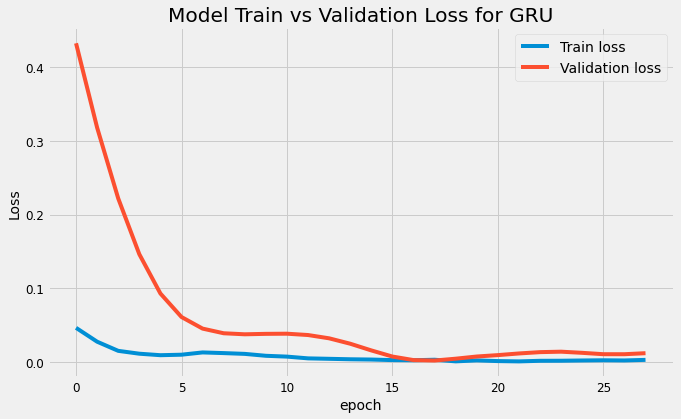

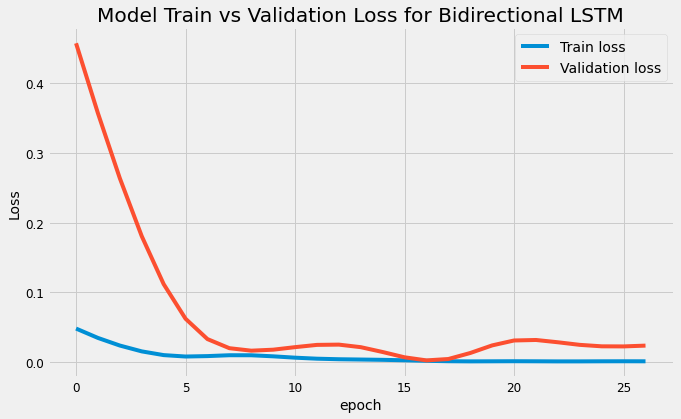

In [42]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
 
plot_loss (history_gru, 'GRU')
plot_loss (history_bilstm, 'Bidirectional LSTM')

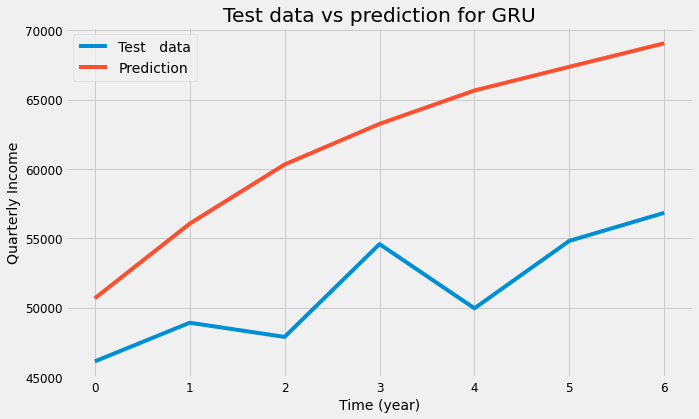

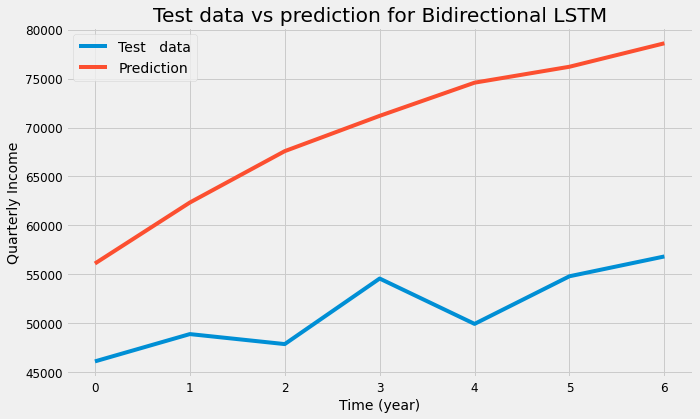

In [43]:
# Make prediction
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler.inverse_transform(prediction)
    return prediction
prediction_gru = prediction(model_gru)
prediction_bilstm = prediction(model_bilstm)
# Plot test data vs prediction
def plot_future(prediction, model_name, y_test):
    plt.figure(figsize=(10, 6))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(scaler.inverse_transform(y_test)), 
             label='Test   data')
    plt.plot(np.arange(range_future), 
             np.array(prediction),label='Prediction')
    plt.title('Test data vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Time (year)')
    plt.ylabel('Quarterly Income')
 
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_bilstm, 'Bidirectional LSTM', y_test)

In [44]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(prediction_gru, scaler.inverse_transform(y_test), 'GRU')
evaluate_prediction(prediction_bilstm, scaler.inverse_transform(y_test), 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 10472.3912
Root Mean Square Error: 11057.1284

Bidirectional LSTM:
Mean Absolute Error: 18223.3047
Root Mean Square Error: 18836.8948



In [45]:
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('')
evaluate_prediction(scaler.transform(prediction_gru), y_test, 'GRU')
evaluate_prediction(scaler.transform(prediction_bilstm), y_test, 'Bidirectional LSTM')

GRU:
Mean Absolute Error: 0.3240
Root Mean Square Error: 0.3420

Bidirectional LSTM:
Mean Absolute Error: 0.5637
Root Mean Square Error: 0.5827



R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
R:\Anaconda\envs\general\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
